# Mapas y Python

Es obvia la importancia de los mapas, para la visualizacion de datos. Las coordenadas, latitud y longitud, pueden describir un punto sobre la tierra. Utilizamos estandares como WGS-84 para atar esas coordenadas a un punto real.

Utilizando MatPlotlib, podemos aprovechar ***Basemap***, una libreria que provee funcionalidad básica de mapa, con la cual podemos construir y componer. Agregar poligonos, puntos, areas, barras, colores, etc; se hace mediante estas librerias.

# Librerias

La libreria mas utilizada en el ecosistema Jupyter-Matplotlib es Basemap. Tambien existen otras, entre ellas, Plotly, que son muy poderosas y convenientes pero tienen dependencias externas.

* [Basemap](https://github.com/matplotlib/basemap/): el "industry standard". Un poco complicado para el setup, bastante poderoso e integrado con matplotlib.
* [Plotly](https://plot.ly/python/getting-started/#start-plotting-online): Una libreria que permite desplegar datos mediante Javascript en la Web
* QGis: Una aplicación completa para el manejo de datos GIS, [tiene bindings en Python y es posible utilizar como libreria](http://docs.qgis.org/testing/en/docs/pyqgis_developer_cookbook/loadlayer.html) para aplicaciónes tanto GUI como en notebooks o [para analizar en scripts y exportar](https://www.airpair.com/python/posts/using-python-and-qgis-for-geospatial-visualization).
* OSMnx: Basada en Open Street Map, Permite tanto analisis como visualización de mapas a nivel de calle, region, ciudad y más.

Para este webinar, vamos a indagar mas en Basemap, que es el mas accesible.


## Basemap

Basemap es una extensión de la funcionalidad disponible 

Existen varias formas de instalarlo, así que puede ser un poco confuso. Dependiendo de el método en el cual tengas instalado matplotlib hace variar la forma apropiada de instalarlo.


### Ambiente de Trabajo


```bash
$ #ESTE_ENV = midevenviroment
$ source ~/miniconda3/envs/$ESTE_ENV/bin/activate

$ conda install jupyter-notebook
$ conda install gdal -c conda-forge
$ conda install basemap -c conda-forge
$ conda install pandas seaborn

## En caso hayan instalado basemap en algun directorio no standard: utiliza un link para la carpeta data.
$ ln -s /home/tian/miniconda3/pkgs/basemap-1.1.0-py36_2/lib/python3.6/site-packages/mpl_toolkits/basemap/data/ /usr/share/basemap
```




In [16]:
# Importamos lo ya usual.
import matplotlib.pyplot as plt
import matplotlib.cm
import pandas as pd
import numpy as np
import seaborn

# Algunas librerias extra que usaremos
from matplotlib.colors import Normalize
import matplotlib.colors as colors
from numpy import array
from numpy import max

# Aqui cargamos Basemap
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection


sns.set(style="white", color_codes=True)

%matplotlib inline

## Mapeando los terremotos globales de la ultima semana
Vamos a usar la feed de datos del [US Geological, ellas tienen disponibles datos referenciados de actividad geologica a nivel mundial, regional y de EEUU](https://earthquake.usgs.gov/earthquakes/feed/v1.0/). 

In [17]:
quakes = pd.read_csv("http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/1.0_week.csv")

# Creamos la lista de latitudes y longitudes.
lats, lons = list(quakes['latitude']), list(quakes['longitude'])


In [60]:
mags = list(quakes['mag'])
quakes.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2017-10-31T16:29:08.330Z,36.746834,-121.467163,9.00,2.78,md,56.0,61.0,0.02078,0.15,...,2017-10-31T16:32:56.802Z,"11km SW of Ridgemark, California",earthquake,0.24,0.45,0.16,66.0,automatic,nc,nc
1,2017-10-31T16:23:50.380Z,19.839001,-155.555664,23.85,2.06,md,44.0,110.0,0.08413,0.13,...,2017-10-31T16:27:14.110Z,"23km SSE of Waimea, Hawaii",earthquake,0.61,0.81,0.19,8.0,automatic,hv,hv
2,2017-10-31T16:15:45.210Z,37.603668,-118.955666,1.43,1.08,md,8.0,198.0,0.01381,0.02,...,2017-10-31T16:25:02.360Z,"5km SSE of Mammoth Lakes, California",earthquake,1.38,1.29,0.17,6.0,automatic,nc,nc
3,2017-10-31T16:14:54.100Z,37.598167,-118.954330,1.40,1.43,md,21.0,150.0,0.01940,0.03,...,2017-10-31T16:23:02.354Z,"5km SSE of Mammoth Lakes, California",earthquake,0.34,0.70,0.26,19.0,automatic,nc,nc
4,2017-10-31T15:54:17.460Z,19.265667,-155.392166,3.49,2.34,ml,47.0,106.0,0.02847,0.21,...,2017-10-31T16:00:00.580Z,"11km NE of Pahala, Hawaii",earthquake,0.37,1.25,0.32,8.0,automatic,hv,hv


### Iniciemos con el mapa

/usr/lib64/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1631: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/usr/lib64/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1775: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


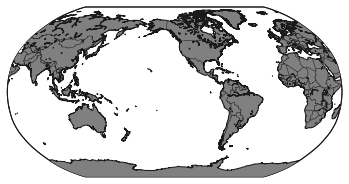

In [25]:
eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray')
eq_map.drawmapboundary()
plt.show()

/usr/lib64/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1631: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/usr/lib64/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1775: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/usr/lib64/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3298: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib64/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3307: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


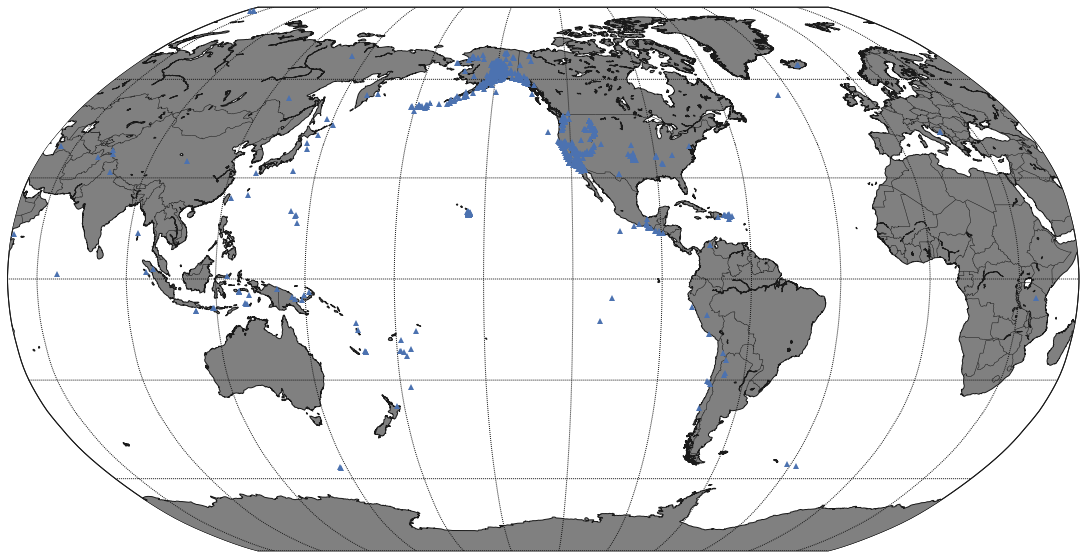

In [64]:
figu, ax = plt.subplots(figsize=(20,10))
eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray')
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))

## Coordenadas a posiciones
x,y = eq_map(lons, lats)
eq_map.plot(x, y, '^', markersize=6)
 
plt.show()

In [33]:
x[0]

17740352.000926033

Veamos esto mas a detalle.

In [28]:
df = pd.read_csv('hiv_cr_data.csv')
df.columns
df.shape # (71, 8)
df.describe()
df.columns
df.loc[df.coordenadas == df.coordenadas]
subset = df.loc[df.coordenadas == df.coordenadas] 
coordenadas = subset[['sitio','latitud', 'longitud', 'coordenadas']]
coordenadas.head()

,sitio,latitud,longitud,coordenadas
0,Esquina Sureste de la Iglesia del Corazón de J...,10.018010,-84.216480,"(10.01801 , -84.21648)"
1,Parque Central de Alajuela,10.016787,-84.213914,"(10.016787 , -84.213914)"
2,"Parque de las Palmas, costado sur del hospital...",10.020168,-84.214064,"(10.020168 , -84.214064)"
3,Mall Internacional,10.006020,-84.212740,"(10.00602 , -84.21274)"
4,Ojo de Agua,9.985120,-84.195540,"(9.98512 , -84.19554)"


In [66]:
coordenadas.count()

sitio          67
latitud        67
longitud       67
coordenadas    67
dtype: int64

In [67]:
coordenadas.coordenadas.head()

0      (10.01801 , -84.21648)
1    (10.016787 , -84.213914)
2    (10.020168 , -84.214064)
3      (10.00602 , -84.21274)
4       (9.98512 , -84.19554)
Name: coordenadas, dtype: object

In [35]:
 (10.01801 , -84.21648)

(10.01801, -84.21648)

/usr/lib64/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3298: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib64/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3307: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


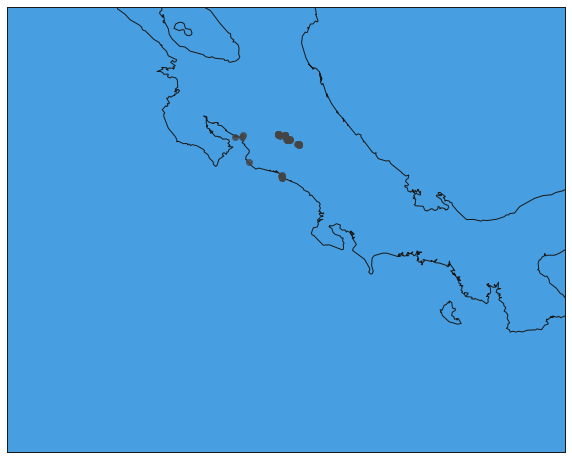

In [30]:
fig, ax = plt.subplots(figsize=(10,20))

mapa = Basemap(projection='merc', 
    lat_0 = 9.74, lon_0 = -83.5,
    resolution = 'i',
    llcrnrlon=-88.1, llcrnrlat=5.5,
    urcrnrlon=-80.1, urcrnrlat=11.8)

mapa.drawmapboundary(fill_color='#479EE0')
mapa.drawcoastlines()


from ast import literal_eval as make_tuple
def unpac(t):
    # haciendo trampa en la vida
    return pd.Series(make_tuple(t))

def plot_area(pos):
    ps = unpac(pos)
    x, y = mapa(ps[1], ps[0])
    mapa.plot(x, y, 'o', markersize=7, color='#444444', alpha=0.8)
    
    
coordenadas.coordenadas.apply(plot_area)


plt.show()

In [12]:
clox = array(coordenadas['longitud'])
clay = array(coordenadas['latitud'])
clo = list(clox)
cla = list(clay)

In [51]:
clay.mean()
clay

array([ 10.01801 ,  10.016787,  10.020168,  10.00602 ,   9.98512 ,
        10.001528,   9.998438,   9.99943 ,   9.998952,   9.996179,
         9.98495 ,   9.99961 ,   9.935734,   9.93335 ,   9.93284 ,
         9.93355 ,   9.9356  ,   9.9359  ,   9.93454 ,   9.927243,
         9.93387 ,   9.93191 ,   9.93378 ,   9.937275,   9.937206,
         9.93281 ,   9.868255,   9.864336,   9.864255,   9.86715 ,
         9.97685 ,   9.99725 ,   9.974695,   9.61626 ,   9.39646 ,
         9.42387 ,   9.43062 ,   9.930423,   9.930036,   9.934636,
         9.929361,   9.937733,   9.930169,   9.927714,   9.934579,
         9.927496,   9.93141 ,   9.938098,   9.927755,   9.933922,
         9.936659,   9.932065,   9.927739,   9.930635,   9.932147,
         9.93535 ,   9.93286 ,   9.927324,  10.018506,  10.018993,
        10.002973,   9.408455,   9.39838 ,   9.403425,   9.40677 ,
         9.866258,   9.865848])

/usr/lib64/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1775: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


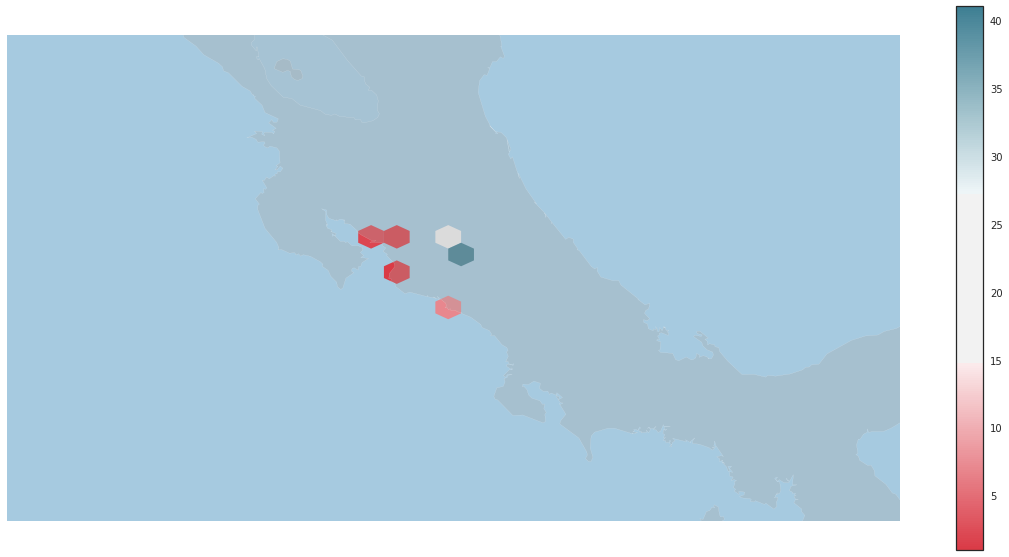

In [58]:

plt.figure(2)
#fig.add_subplot(223)
fig2, ax2 = plt.subplots(figsize=(20,10))

mapa2 = Basemap(projection='merc', 
    lat_0 = 9.74, lon_0 = -83.5,
    resolution = 'i',
    llcrnrlon=-88.1, llcrnrlat=7.5,
    urcrnrlon=-80.1, urcrnrlat=11.8)
pos_x, pos_y = mapa2(clox, clay)
mapa2.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
mapa2.fillcontinents(color='darkgrey', alpha=0.3)
mapa2.drawcoastlines(linewidth=0.1, color="white")

paleta = seaborn.diverging_palette(10, 220, sep=80, as_cmap=True)

#sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True)

hb = plt.hexbin(pos_x, pos_y, gridsize=4, mincnt=1,
    edgecolor='none', cmap = paleta)

cb = fig2.colorbar(hb, ax=ax2)



plt.show()

## Cool links

* http://beneathdata.com/how-to/visualizing-my-location-history/
* https://pypi.python.org/pypi/descartes
*
